# Importando Bibliotecas

In [155]:
## Análise de Dados ##
import pandas as pd
import warnings as wa
import matplotlib.pyplot as plt

## Regressão Linear ##
import numpy as np
from sklearn.linear_model import LinearRegression
 
## Ignorando warnings do tipo FutureWarning ##
wa.simplefilter( action='ignore', category= FutureWarning)
pd.options.mode.chained_assignment = None

# Carregando dataset

In [156]:
path_original = "https://github.com/edneres/TINKERINO/blob/main/imdb-videogames.csv?raw=true" 
df_original = pd.read_csv(path_original  , delimiter=",")

In [157]:
display(df_original.columns)

Index(['Unnamed: 0', 'name', 'url', 'year', 'certificate', 'rating', 'votes',
       'plot', 'Action', 'Adventure', 'Comedy', 'Crime', 'Family', 'Fantasy',
       'Mystery', 'Sci-Fi', 'Thriller'],
      dtype='object')

In [158]:
display(df_original)

,Unnamed: 0,name,url,year,certificate,rating,votes,plot,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,0,Spider-Man,https://www.imdb.com/title/tt5807780/?ref_=adv...,2018.0,T,9.2,"20,759","When a new villain threatens New York City, Pe...",True,True,False,False,False,True,False,False,False
1,1,Red Dead Redemption II,https://www.imdb.com/title/tt6161168/?ref_=adv...,2018.0,M,9.7,"35,703",Amidst the decline of the Wild West at the tur...,True,True,False,True,False,False,False,False,False
2,2,Grand Theft Auto V,https://www.imdb.com/title/tt2103188/?ref_=adv...,2013.0,M,9.5,"59,986",Three very different criminals team up for a s...,True,False,False,True,False,False,False,False,False
3,3,God of War,https://www.imdb.com/title/tt5838588/?ref_=adv...,2018.0,M,9.6,"26,118","After wiping out the gods of Mount Olympus, Kr...",True,True,False,False,False,False,False,False,False
4,4,Uncharted 4: A Thief's End,https://www.imdb.com/title/tt3334704/?ref_=adv...,2016.0,T,9.5,"28,722",Thrown back into the dangerous underworld he'd...,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20798,20798,"Enjoy Your Power, Enjoy Your Choice",https://www.imdb.com/title/tt3845606/?ref_=adv...,2014.0,NaN,NaN,NaN,Add a Plot,False,False,False,False,False,False,False,False,True
20799,20799,RedSun2020,https://www.imdb.com/title/tt0790739/?ref_=adv...,2004.0,NaN,NaN,NaN,Joseph gets kidnapped and it's the player's jo...,False,False,False,False,False,False,False,False,True
20800,20800,Shutter,https://www.imdb.com/title/tt5119948/?ref_=adv...,2015.0,NaN,NaN,NaN,A tech support man who uses a drone to investi...,False,False,False,False,False,False,False,False,True
20801,20801,The Music Machine,https://www.imdb.com/title/tt5142082/?ref_=adv...,2015.0,NaN,NaN,NaN,A young teenage girl and the ghost of a dead m...,False,False,False,False,False,False,False,False,True


# Excluindo colunas indesejadas

In [159]:
df_jogos = df_original.drop('url', axis = 1)
df_jogos = df_jogos.drop('plot', axis = 1)
df_jogos = df_jogos.drop('Unnamed: 0', axis = 1)

# axis = 1 >> refere-se a colunas; axis = 0 >> refere-se a linhas

In [160]:
display(df_jogos.columns)

Index(['name', 'year', 'certificate', 'rating', 'votes', 'Action', 'Adventure',
       'Comedy', 'Crime', 'Family', 'Fantasy', 'Mystery', 'Sci-Fi',
       'Thriller'],
      dtype='object')

In [161]:
display(df_jogos)

,name,year,certificate,rating,votes,Action,Adventure,Comedy,Crime,Family,Fantasy,Mystery,Sci-Fi,Thriller
0,Spider-Man,2018.0,T,9.2,"20,759",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,2018.0,M,9.7,"35,703",True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,2013.0,M,9.5,"59,986",True,False,False,True,False,False,False,False,False
3,God of War,2018.0,M,9.6,"26,118",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,2016.0,T,9.5,"28,722",True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20798,"Enjoy Your Power, Enjoy Your Choice",2014.0,NaN,NaN,NaN,False,False,False,False,False,False,False,False,True
20799,RedSun2020,2004.0,NaN,NaN,NaN,False,False,False,False,False,False,False,False,True
20800,Shutter,2015.0,NaN,NaN,NaN,False,False,False,False,False,False,False,False,True
20801,The Music Machine,2015.0,NaN,NaN,NaN,False,False,False,False,False,False,False,False,True


# Renomeando as Colunas

In [162]:
df_jogos = df_jogos.rename(columns = {'name': 'Jogo', 'year': 'Ano', 'certificate': 'Classificação', 'rating': 'Avaliação (IMDB)', 'votes': 'Votos'})
df_jogos = df_jogos.rename(columns = {'Action': 'Ação', 'Adventure': 'Aventura', 'Comedy': 'Comédia', 'Family': 'Família', 'Mystery': 'Mistério', 'Thriller': 'Filme de Ação', 'Fantasy': 'Fantasia'})

In [163]:
display(df_jogos.head())

,Jogo,Ano,Classificação,Avaliação (IMDB),Votos,Ação,Aventura,Comédia,Crime,Família,Fantasia,Mistério,Sci-Fi,Filme de Ação
0,Spider-Man,2018.0,T,9.2,"20,759",True,True,False,False,False,True,False,False,False
1,Red Dead Redemption II,2018.0,M,9.7,"35,703",True,True,False,True,False,False,False,False,False
2,Grand Theft Auto V,2013.0,M,9.5,"59,986",True,False,False,True,False,False,False,False,False
3,God of War,2018.0,M,9.6,"26,118",True,True,False,False,False,False,False,False,False
4,Uncharted 4: A Thief's End,2016.0,T,9.5,"28,722",True,True,False,False,False,False,False,False,False


E >> Everyone

T >> Teen

M >> Mature 17+

A >> Adults only 18+

# Análise de Certificação de Classificação

Quantidade de jogos por certificado de classificação

In [164]:
Class_count = df_jogos['Classificação'].value_counts()

# O método ".value_counts()" fornece a contagem/quantidade de cada categoria na coluna "Classificação"

In [165]:
type(Class_count)

pandas.core.series.Series

In [166]:
display(Class_count)

T            2474
E            2006
M            1820
E10+          814
Unrated       241
K-A           227
Not Rated     184
AO             32
GA             26
EC             25
CE             13
12              9
PG-13           7
MA-13           7
Approved        4
G               4
MA-17           3
PG              3
TV-MA           2
Passed          1
TV-14           1
Name: Classificação, dtype: int64

Unrated   >> Sem Classificação

Not Rated >> Não Avaliado



In [167]:
Class_count = Class_count.rename('Quantidade').reset_index().rename(columns={'index': 'Classificação'})

# Utilizar o método ".rename()" na série resultante do método ".value_counts()" atribui o nome ("Quantidade") à coluna de contagem/quantidade
# O método ".reset_index()" transforma a série em um DataFrame e reiniciar o índice. Por fim
# O método ".rename()" é novamente para renomear a coluna do índice (para "Classificação").
# Dessa forma, o resultado terá as colunas nomeadas

In [168]:
type(Class_count)

pandas.core.frame.DataFrame

In [169]:
display(Class_count) # Data Frame

,Classificação,Quantidade
0,T,2474
1,E,2006
2,M,1820
3,E10+,814
4,Unrated,241
5,K-A,227
6,Not Rated,184
7,AO,32
8,GA,26
9,EC,25


## Gráfico em Barras

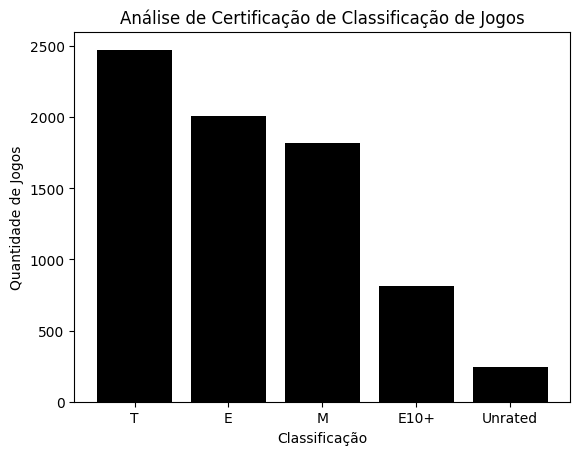

In [170]:
plt.bar(Class_count['Classificação'].head(5), Class_count['Quantidade'].head(5), color='black')

# Personalizar o gráfico
plt.title('Análise de Certificação de Classificação de Jogos')
plt.xlabel('Classificação')
plt.ylabel('Quantidade de Jogos')

plt.show()

### Opção 2

In [171]:
#Soma_Outros_Dados = Class_count.head(2).sum().transpose()
#display(Soma_Outros_Dados)

Soma_Outros_Dados = Class_count.loc[5:20].sum().transpose()
display(Soma_Outros_Dados['Quantidade'])
type(Soma_Outros_Dados)

548

pandas.core.series.Series

In [172]:
# Criar a nova linha
nova_linha = pd.DataFrame({'Classificação': ['Outras'], 'Quantidade':[548]})

# Adiciona a nova linha no final do DataFrame
Class_count_resumido = Class_count.head().append(nova_linha, ignore_index=True)
display(Class_count_resumido)

,Classificação,Quantidade
0,T,2474
1,E,2006
2,M,1820
3,E10+,814
4,Unrated,241
5,Outras,548


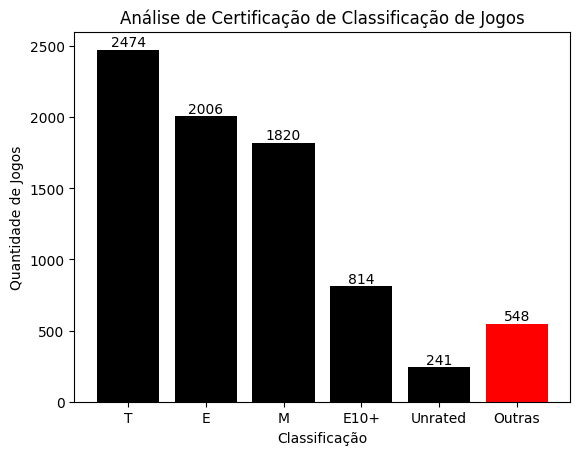

In [173]:
# Lista de cores para as barras
cores = ['black', 'black', 'black', 'black', 'black', 'red']
plt.bar(Class_count_resumido['Classificação'], Class_count_resumido['Quantidade'], color = cores)

# Personalizar o gráfico
plt.title('Análise de Certificação de Classificação de Jogos')
plt.xlabel('Classificação')
plt.ylabel('Quantidade de Jogos')

# Adicionar os valores exatos como rótulos em cima de cada barra
for i, v in enumerate(Class_count_resumido['Quantidade']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Análise de lançamentos por ano

In [174]:
# Agrupar os dados por ano e contar o número de lançamentos em cada ano
analise_lancamento = df_jogos.groupby('Ano').size().reset_index(name='Quantidade')

# O método "groupby()" agrupa os dados pela coluna 'Ano'
# O método "size()" conta o número de lançamentos em cada ano
# O "reset_index(name='count')" redefine o índice do DataFrame resultante e renomea a coluna de contagem para 'Quantidade'

In [175]:
# Ordenar os resultados pelo ano em ordem crescente
analise_lancamento = analise_lancamento.sort_values('Quantidade')

# O método 'sort_values()' ordena os resultados pela quantidade(em ordem crescente)

In [176]:
# Imprimir a análise de lançamento por ano
display(analise_lancamento)

,Ano,Quantidade
0,1952.0,1
2,1964.0,1
60,2027.0,1
3,1969.0,2
4,1970.0,2
...,...,...
49,2015.0,761
50,2016.0,828
51,2017.0,863
52,2018.0,872


## Gráfico de Dispersão

É uma visualização que mostra a relação entre duas variáveis contínuas. Útil para identificar padrões, tendências e correlações entre os dados.

Através de um gráfico de dispersão, é possível observar visualmente se existe uma relação linear, não linear, positiva, negativa ou nenhuma relação aparente entre as variáveis. Além disso, é possível identificar outliers, agrupamentos e padrões que podem fornecer insights sobre os dados.

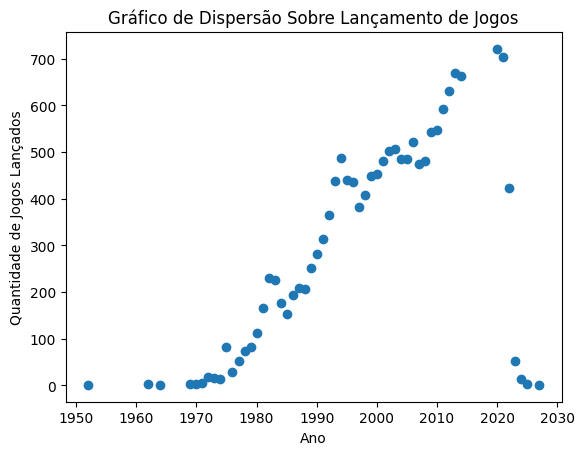

In [183]:
# Criar o gráfico de dispersão
plt.scatter(analise_lancamento['Ano'].head(56), analise_lancamento['Quantidade'].head(56))

# Adicionar rótulos aos eixos x e y
plt.xlabel('Ano')
plt.ylabel('Quantidade de Jogos Lançados')

# Adicionar um título ao gráfico
plt.title('Gráfico de Dispersão Sobre Lançamento de Jogos')

# Exibir o gráfico
plt.show()

# Regressão Linear

In [184]:
# Dados de exemplo
ano = analise_lancamento['Ano'].values.reshape(-1, 1)               # x
quantidade = analise_lancamento['Quantidade'].values.reshape(-1, 1) # y

# O método "reshape()" (Numpay) modifica a forma (shape) do array, reorganizando os elementos em uma nova estrutura
# O "reshape(-1, 1)" é usado para transformar um array em uma matriz de uma coluna, mantendo a quantidade total de elementos do array original
# O uso de -1 no reshape(-1, 1) garante que o número total de elementos seja preservado enquanto a estrutura do array é modificada para ter apenas uma coluna.c
# O reshape(-1, 1) é aplicado ao array de entrada (x) para garantir que ele tenha a forma adequada para ser usado como entrada em modelos de regressão linear.

In [185]:
# Criar o objeto de regressão linear
regressor = LinearRegression().fit(ano, quantidade)

In [186]:
# Imprime o coeficiente e o intercepto do modelo
print('Coeficiente:', regressor.coef_[0][0])
print('Intercepto:', regressor.intercept_[0])

Coeficiente: 9.920539831775136
Intercepto: -19461.163866906794


A **inclinação** da linha de regressão (**coeficiente**) indica a taxa de mudança na quantidade de jogos lançados por unidade de aumento no ano.
*Coeficiente Positivo >> Tendência de aumento na quantidade de jogos lançados com o passar dos anos*

O **intercepto** da linha de regressão indica o valor esperado da quantidade de jogos lançados quando o ano é igual a zero. **OBS:** nesse contexto específico, o intercepto pode não ter um significado prático, pois não há registros de jogos antes de 1952 (seguindo o conceito atual de jogo)

In [187]:
# Gerar as previsões
previsao = regressor.predict(ano)

## Gráfico de Dispersão

Se os pontos estiverem mais próximos da linha, indica uma relação mais forte entre as variáveis. Por outro lado, se os pontos estiverem mais dispersos, sugere uma relação mais fraca.

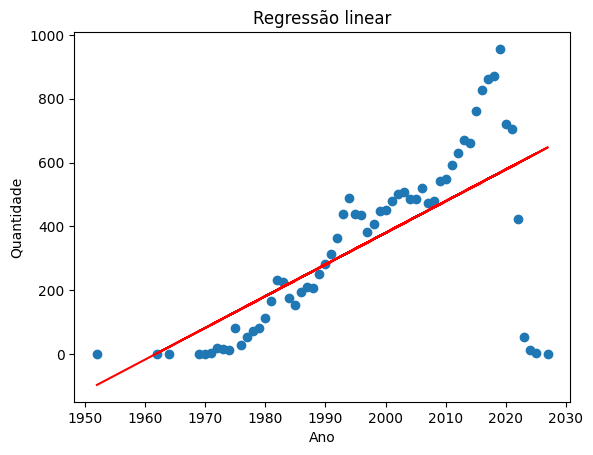

In [188]:
# Plota o gráfico de dispersão dos dados e a linha de regressão
plt.scatter(ano, quantidade)
plt.plot(ano, previsao, color='red')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.title('Regressão linear')
plt.show()